In [1]:
from dataclasses import dataclass
import itertools
import logging
import random
import math
import numpy as np
import json
import pickle
import time
import torch
import sys
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from probe_utils import *
from plot_utils import *
from tqdm import tqdm

from omegaconf import OmegaConf
from pathlib import Path
from torch import nn, Tensor
from torch.nn import functional as F
from typing import List, Optional, Tuple
import os
# os.chdir("/data/tianyu_guo/birth")
from data import DataArgs, Dataset, iterate_batches, make_dataset
from ihead_full_model import *

%load_ext autoreload
%autoreload 2


In [2]:
torch.cuda.set_device(2)
device = 'cuda:2'
# run_path_server = "/data/tianyu/birth/gens/pre-iclr/dynamics/dormant_copy_k3_bos1"
run_path_server = "/data/tianyu/birth/gens/pre-iclr/dynamics/dormant_copy_long_train_redo"
no_attn = ( )
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model_loader = ModelLoader(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, bos_num=1, train_steps=10000, delim=0, n_layers=3, n_heads=1, no_attn_norm=(), no_ffn_norm=(), no_attn=no_attn, no_ffn=(), linear_ffn=(), with_data=True, with_optim=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu/birth/data", device=device) 
model, cfg, x, y, ds, optim = model_loader(with_data=True)
triggers_pos = ds.get_triggers_pos(x.to('cpu'))
hook_dict = {"basic": forward_hook([], ''), "no_attn_0": check_embed(target_layers=[0, 1, 2], target_heads=[(0, 0)], target_mlp_layers=[]), "no_mlp_0": check_embed(target_layers=[0, 1, 2], target_heads=[], target_mlp_layers=[0]), "clean_attn": clean_attn(list(set([1, 2]) - set(no_attn)), torch.from_numpy(triggers_pos))}
keys = ["icl_risk", "markov_risk", "bos_attn", "output_norm", "value_norm", "output_state", "value_state", "attn_logits", "grads_fr", "grads_l2", "adam_fr", "adam_l2", "norm_influence"]
pred, outputs_list = model.modified_forward_with_hook(x, hook_dict['basic'])

ConfigAttributeError: Missing key attn_use_relu
    full_key: model_args.attn_use_relu
    object_type=dict

In [38]:
outputs_list[2]['value_states'][0, 0, :10, :].norm(dim=-1), outputs_list[0]['attn_output'][0, :10, :].norm(dim=-1), outputs_list[0]['mlp_output'][0, :10, :].norm(dim=-1), outputs_list[1]['output'][0, :10, :].norm(dim=-1)

(tensor([ 8.0294, 23.2850, 11.4267, 23.3082,  6.1005, 14.5760, 18.0206, 11.5925,
         18.2343, 13.3980], device='cuda:2',
        grad_fn=<LinalgVectorNormBackward0>),
 tensor([114.5668,   6.9209,   5.6573,   4.8389,   5.1533,   4.4944,   4.1030,
           4.1070,   4.5833,   4.1927], device='cuda:2',
        grad_fn=<LinalgVectorNormBackward0>),
 tensor([ 6.2179, 13.9316, 11.4584, 13.6463, 17.4933, 19.9384, 18.5914, 14.6289,
         17.0753, 17.7421], device='cuda:2',
        grad_fn=<LinalgVectorNormBackward0>),
 tensor([144.5070,  38.3525,  17.7747,  37.1558, 257.0485,  55.6434,  51.5054,
          17.5116,  51.1855,  70.7671], device='cuda:2',
        grad_fn=<LinalgVectorNormBackward0>))

In [4]:
torch.cuda.set_device(2)
device = 'cuda:2'
run_path_server = "/data/tianyu/birth/gens/pre-iclr/dynamics/dormant_copy_simplified"
# run_path_server = "/data/tianyu/birth/gens/pre-iclr/dynamics/dormant_copy_long_train_redo"
no_attn = (2, )
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model_loader = ModelLoader(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, bos_num=1, train_steps=10000, delim=0, n_layers=3, n_heads=1, no_attn_norm=(), no_ffn_norm=(), no_attn=no_attn, no_ffn=(), linear_ffn=(), with_data=True, with_optim=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu/birth/data", device=device)
model, cfg, x, y, ds, optim = model_loader(with_data=True)
triggers_pos = ds.get_triggers_pos(x.to('cpu'))
hook_dict = {"basic": forward_hook([], ''), "no_attn_0": check_embed(target_layers=[0, 1, 2], target_heads=[(0, 0)], target_mlp_layers=[]), "no_mlp_0": check_embed(target_layers=[0, 1, 2], target_heads=[], target_mlp_layers=[0]), "clean_attn": clean_attn(list(set([1, 2]) - set(no_attn)), torch.from_numpy(triggers_pos))}
keys = ["icl_risk", "markov_risk", "bos_attn", "output_norm", "value_norm", "output_state", "value_state", "attn_logits", "grads_fr", "grads_l2", "adam_fr", "adam_l2", "norm_influence"]
pred, outputs_list = model.modified_forward_with_hook(x, hook_dict['basic'])

/data/tianyu/miniconda3/envs/nanogpt/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


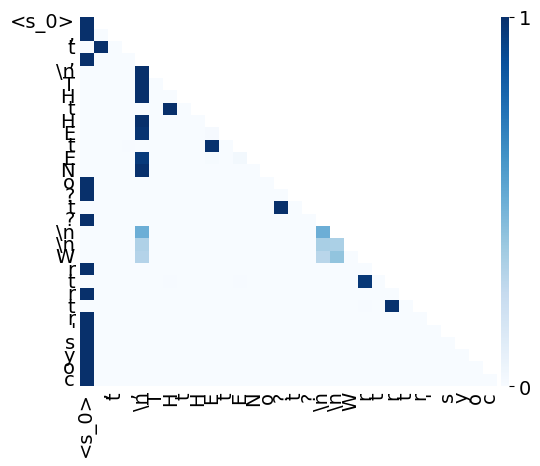

In [17]:
seq_indices = [0]
seq_len = 30
layer_idx = 2
head_idx = 0
plot_attn_weights(outputs_list, x, ds, seq_indices, seq_len, layer_idx, head_idx, seq_start=0, keep_label=None, ticks_size=14, titles=[], save_files_fn=[], fn=None)

In [18]:
model_loader.model_name_from_args

'model_L3_H1_bos1_delim0'

In [19]:
summary_dynamic_traj = model_loader.load_dynamic_summary()
steps_list, summary_dynamic_cat = concat_summary(summary_dynamic_traj, hook_dict, keys=keys+["norm_influence_grad", "norm_influence_update"], )

In [20]:
steps_list

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700,
 720,
 740,
 760,
 780,
 800,
 820,
 840,
 860,
 880,
 900,
 920,
 940,
 960,
 980,
 1000,
 1020,
 1040,
 1060,
 1080,
 1100,
 1120,
 1140,
 1160,
 1180,
 1200,
 1220,
 1240,
 1260,
 1280,
 1300,
 1320,
 1340,
 1360,
 1380,
 1400,
 1420,
 1440,
 1460,
 1480,
 1500,
 1520,
 1540,
 1560,
 1580,
 1600,
 1620,
 1640,
 1660,
 1680,
 1700,
 1720,
 1740,
 1760,
 1780,
 1800,
 1820,
 1840,
 1860,
 1880,
 1900,
 1920,
 1940,
 1960,
 1980,
 2000,
 2020,
 2040,
 2060,
 2080,
 2100,
 2120,
 2140,
 2160,
 2180,
 2200,
 2220,
 2240,
 2260,
 2280,
 2300,
 2320,
 2340,
 2360,
 2380,
 2400,
 2420,
 2440,
 2460,
 2480,
 2500,
 2520,
 2540,
 2560,
 2580,
 2600,
 2620,
 2640,
 2660,
 2680,
 2700,
 2720,
 2740,
 2760,
 2780,
 2800,
 2820,
 2840,
 2860,
 2880,
 2900,
 2920,
 2940,
 2960,
 2980,
 3000,

/tmp/ipykernel_1199535/1705868744.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100000)


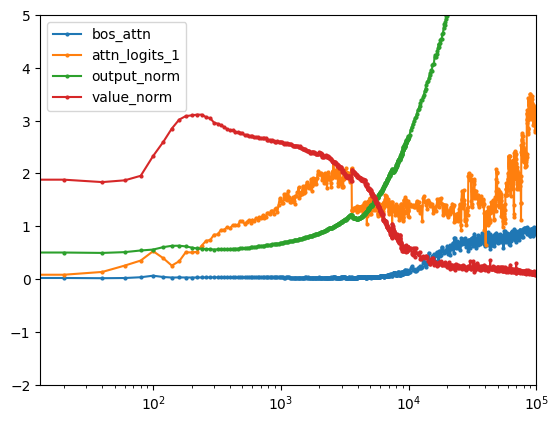

In [36]:
# plt.plot(steps_list, summary_dynamic_cat["basic"]["icl_risk"], label="icl_risk", marker = 'o', markersize=2)
# plt.plot(steps_list, summary_dynamic_cat["basic"]["markov_risk"], label="markov_risk", marker = 'o', markersize=2)
plt.plot(steps_list, summary_dynamic_cat["basic"]["bos_attn"][:, 1], label="bos_attn", marker = 'o', markersize=2)
# plt.plot(steps_list, summary_dynamic_cat["basic"]["attn_logits"][:, 2, 1]/15, label="attn_logits_2", marker = 'o', markersize=2)
plt.plot(steps_list, summary_dynamic_cat["basic"]["attn_logits"][:, 2, 1]/15, label="attn_logits_1", marker = 'o', markersize=2)
plt.plot(steps_list, summary_dynamic_cat["basic"]["output_norm"][:, 0]/50, label="output_norm", marker = 'o', markersize=2)
plt.plot(steps_list, summary_dynamic_cat["basic"]["value_norm"][:, 1]/5, label="value_norm", marker = 'o', markersize=2)
plt.gca().set_xscale('log')
plt.xlim(0, 100000)
plt.ylim(-2, 5)
plt.legend()
plt.show()

In [26]:
for n, influ in summary_dynamic_cat["basic"]["norm_influence"].items():
    print(n, influ.mean())
for n, influ in summary_dynamic_cat["clean_attn"]["norm_influence"].items():
    print(n, influ.mean())
weights_subset = ['layers.0.attention.wv.weight']

tok_embeddings.weight 0.0013310477092316577
pos_embeddings.weight 0.0013308723318378858
layers.0.attention.wq.weight 0.0
layers.0.attention.wk.weight 0.0
layers.0.attention.wv.weight 0.10056783984135885
layers.0.attention.wo.weight 0.016069091304761605
layers.0.ff.w1.weight -0.0003197573709703657
layers.0.ff.w2.weight 0.0006107538517323962
layers.0.attention_norm.weight 0.0047170313221242405
layers.0.attention_norm.bias 0.006743448612266407
layers.0.ff_norm.weight -9.410255220690451e-07
layers.0.ff_norm.bias 3.707536639591283e-06
tok_embeddings.weight -0.003044993432564961
pos_embeddings.weight -0.0030451692245553833
layers.0.attention.wq.weight 0.0
layers.0.attention.wk.weight 0.0
layers.0.attention.wv.weight -0.2788753889462351
layers.0.attention.wo.weight -0.004790756916114987
layers.0.ff.w1.weight -0.020129120816989803
layers.0.ff.w2.weight -0.000877763694431339
layers.0.attention_norm.weight -0.08377607575045891
layers.0.attention_norm.bias 0.028493889902552718
layers.0.ff_norm.we

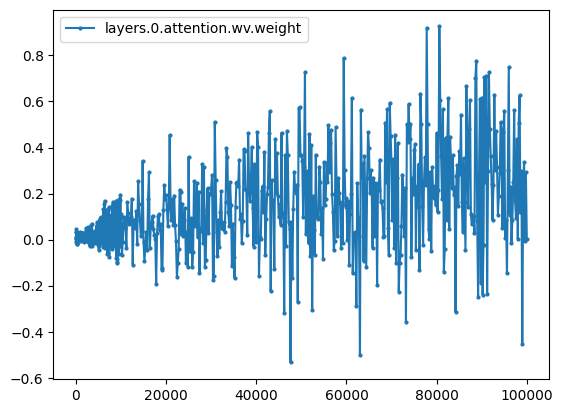

In [27]:
for n, influ in summary_dynamic_cat["basic"]["norm_influence"].items():
    if n in weights_subset:
        plt.plot(steps_list, influ, label=n, marker = 'o', markersize=2)
plt.legend()
plt.show()

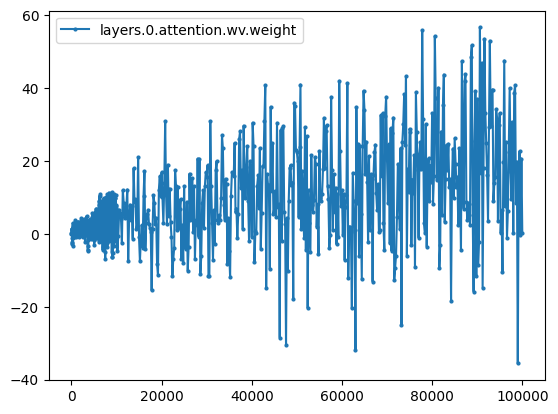

In [28]:
for n, influ in summary_dynamic_cat["basic"]["norm_influence_grad"].items():
    if n in weights_subset:
        plt.plot(steps_list, influ, label=n, marker = 'o', markersize=2)
plt.legend()
plt.show()

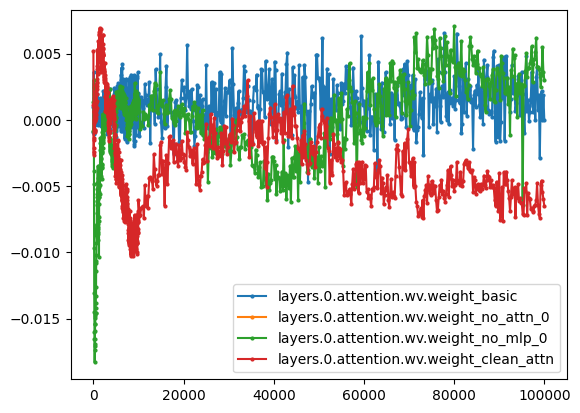

In [29]:
# weights_subset = ['layers.0.attention.wv.weight', 'layers.0.ff.w1.weight', ]
weights_subset = ['layers.0.attention.wv.weight', ]
for hook_name in summary_dynamic_cat.keys():
    for n, influ in summary_dynamic_cat[hook_name]["norm_influence_update"].items():
        if n in weights_subset:
            plt.plot(steps_list, influ, label=n+"_"+hook_name, marker = 'o', markersize=2)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


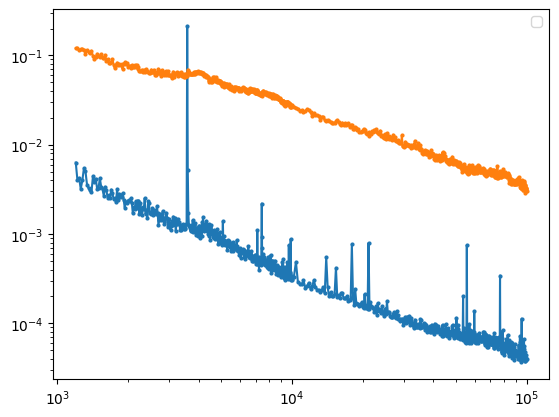

In [30]:
plt.plot(steps_list[60:], summary_dynamic_cat["basic"]["grads_fr"]['layers.0.attention.wv.weight'][60:], marker = 'o', markersize=2)
plt.plot(steps_list[60:], summary_dynamic_cat["clean_attn"]["grads_fr"]['layers.0.attention.wv.weight'][60:], marker = 'o', markersize=2)
plt.legend()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

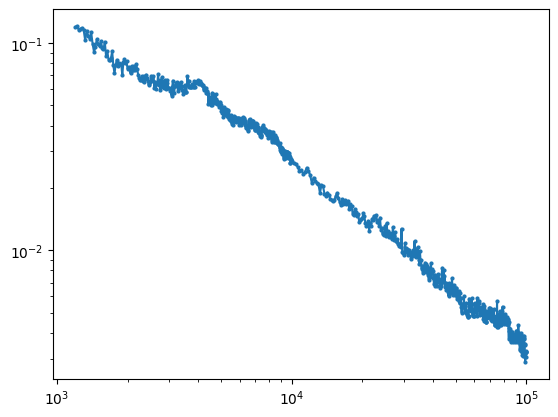

In [31]:
plt.plot(steps_list[60:], summary_dynamic_cat["clean_attn"]["grads_fr"]['layers.0.attention.wv.weight'][60:], marker = 'o', markersize=2)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

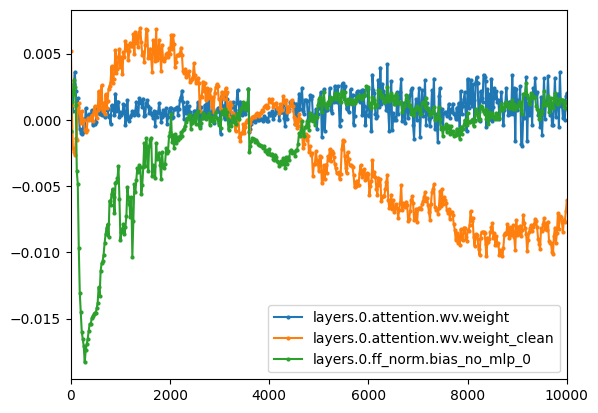

In [33]:
for n, influ in summary_dynamic_cat["basic"]["norm_influence_update"].items():
    if n in weights_subset:
        plt.plot(steps_list, influ, label=n, marker = 'o', markersize=2)
for n, influ in summary_dynamic_cat["clean_attn"]["norm_influence_update"].items():
    if n in weights_subset:
        plt.plot(steps_list, influ, label=n+'_clean', marker = 'o', markersize=2)
plt.plot(steps_list, summary_dynamic_cat["no_mlp_0"]["norm_influence_update"]['layers.0.attention.wv.weight'], label=n+'_no_mlp_0', marker = 'o', markersize=2)
plt.xlim(0, 10000)
plt.legend()
plt.show()

In [62]:
for n, value in summary_dynamic_cat["basic"]["grads_fr"].items():
    log_x = np.log(steps_list[60:])
    log_y = np.log(value[60:])
    coefficients = np.polyfit(log_x, log_y, 1)
    print(n, coefficients)

tok_embeddings.weight [-0.71850464 -1.61889603]
pos_embeddings.weight [-0.67124691 -2.21878345]
layers.0.attention.wq.weight [-0.97404529 -0.5368756 ]
layers.0.attention.wk.weight [-0.95951912 -0.6764751 ]
layers.0.attention.wv.weight [-1.30786311  4.03778874]
layers.0.attention.wo.weight [-1.00060635  2.15996786]
layers.0.ff.w1.weight [-0.69862615  0.342837  ]
layers.0.ff.w2.weight [-0.80777144  1.78550349]
layers.0.attention_norm.weight [-0.91771794 -2.17773561]
layers.0.attention_norm.bias [-0.72763319 -2.47645781]
layers.0.ff_norm.weight [-0.59200799 -3.04493823]
layers.0.ff_norm.bias [-0.75786241 -1.16974935]
layers.1.attention.wq.weight [-1.83375811  5.82535147]
layers.1.attention.wk.weight [-1.91278565  6.35210217]
layers.1.attention.wv.weight [-1.29000731  5.1287375 ]
layers.1.attention.wo.weight [-1.66798932  6.45394584]
layers.1.ff.w1.weight [-0.56356113 -0.90009488]
layers.1.ff.w2.weight [-0.41804878 -1.12928009]
layers.1.attention_norm.weight [-1.16871548  1.50256416]
layer